In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys,glob,math
#import h5py as h5
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']

import optstat
import makesims

try:
    from IPython.core.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False

day = 24 * 3600
year = 365.25 * day

In order to run a simulation, all you need to do is specify a name for your dataset (in this case, dataset2).

In [2]:
Agwb = 5e-15
dataset = 'dataset3'

makesims.create_dataset(dataset, Agwb)

Getting pulsar parameters for simulated dataset...
--> Extracting J0613-0200 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J0751+1807 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J1012+5307 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J1640+2224 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J1643-1224 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J1713+0747 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J1744-1134 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J1857+0943 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J1909-3744 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

--> Extracting J2145-0750 from hdf5 file
--> Done extracting pulsar from hdf5 file :-) 

J0613-0200 ../data/sim_parfiles/J0613-0200_stripped.par 1.5

In [3]:
optstat.run_noise_analysis(dataset)

Running the common red noise analysis for the simulated dataset...
Noise chains saved in directory ../data/chains/dataset3
Running the individual white noise analyses for each pulsar...
Making the noise files for each pulsar in directory ../data/noisefiles/dataset3
Finished!


In [4]:
psrlist = list(np.loadtxt('../data/psrList.txt', dtype='S42'))
h5file = '../data/simulated_data/' + dataset + '/sim.hdf5'
opts, sigs, snr = optstat.compute_optstat_marg(dataset, psrlist, nf=30, 
                                               noVaryNoise=True, incJitterEquad=False, 
                                               incEquad=False)

Initializing model...
Using longest timespan of 17.6334500107 yr for Tmax
Loading chains from ../data/chains/dataset3/fix_spec_nf_30/chain_1.txt
Running 1000 realizations of the noise...
Writing output to file ../data/optstat/dataset3/marg_os.dat


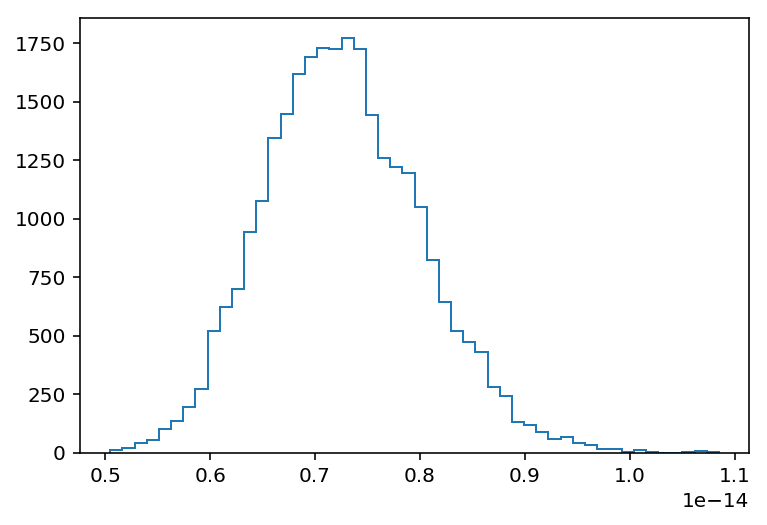

In [5]:
chain = np.loadtxt('../data/chains/' + dataset + '/fix_spec_nf_30/chain_1.txt')
burn = int(0.25*chain.shape[0])
plt.hist(10.**chain[burn:,-5], histtype='step', bins=50);

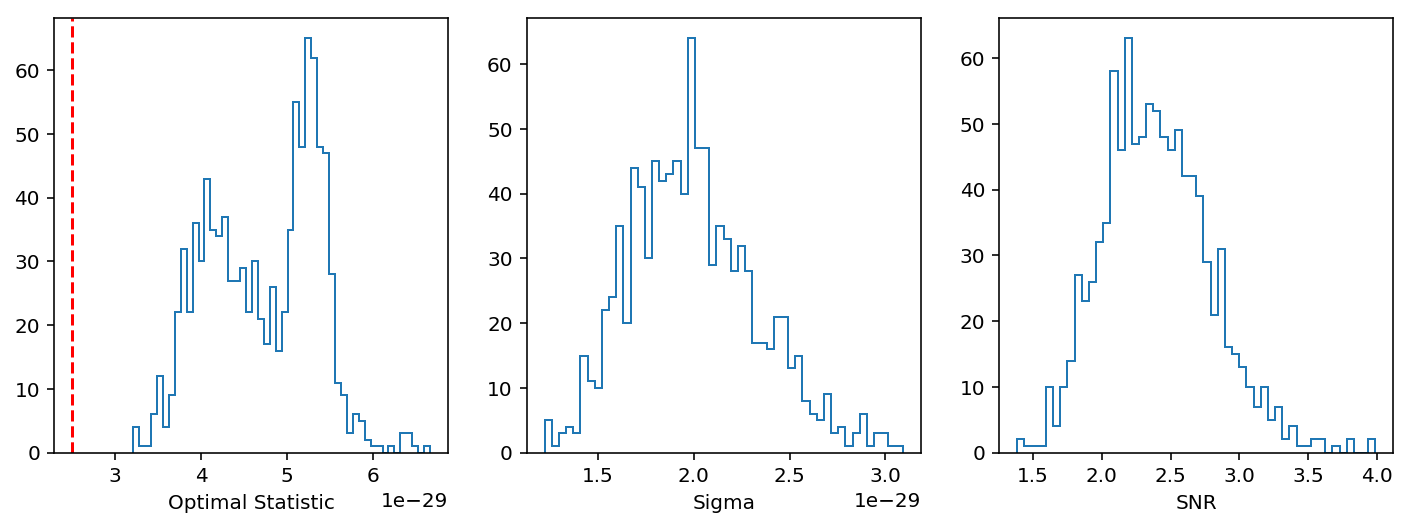

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
for i, a in enumerate([opts, sigs, snr]):
    axs[i].hist(a, histtype='step', bins=50);
axs[0].axvline(Agwb**2, color='r', ls='--')
axs[0].set_xlabel('Optimal Statistic')
axs[1].set_xlabel('Sigma')
axs[2].set_xlabel('SNR')